In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   Bike Lane Type (FT_FACILIT)  Total Crashes
6               Protected Path          10558
10                    Standard           7459
7                     Sharrows           4197
1        Bike-Friendly Parking           1169
3                     Curbside            663
4                     Greenway            355
9                 Signed Route            341
8                     Sidewalk            171
2                     Buffered             84
5                         Link             20


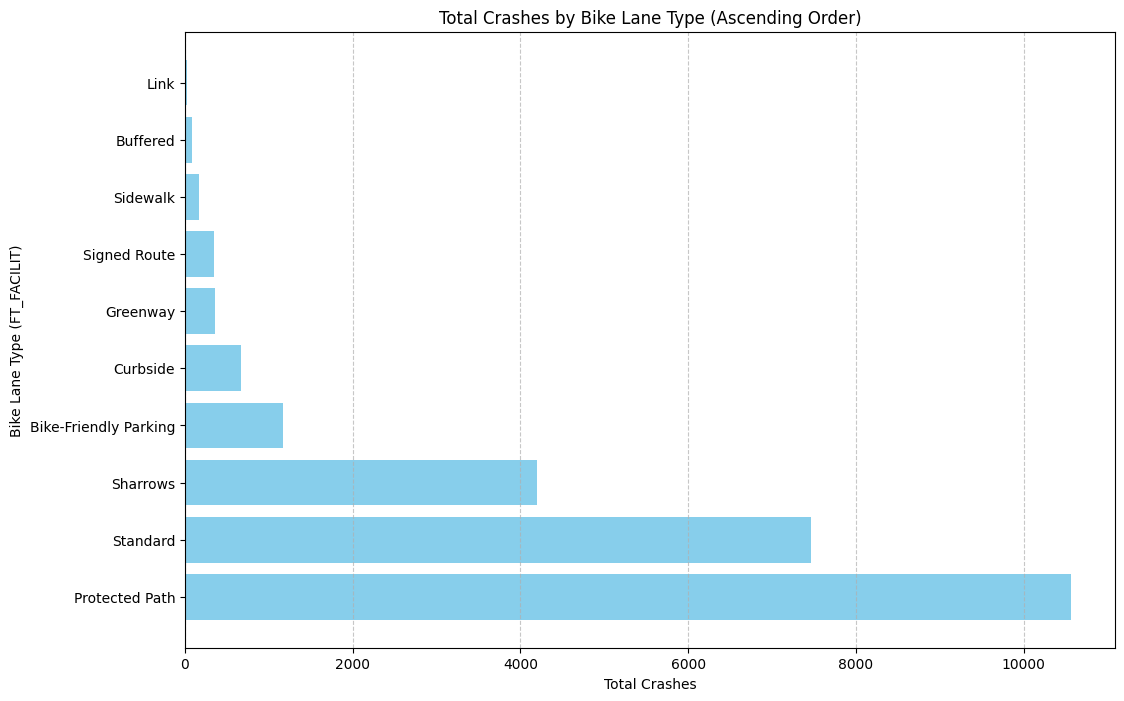

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# loading the CSV file
file_path = '/content/drive/MyDrive/IADS Group Project/csv dumps/largeFinal-2024-12-07_002.csv'
data = pd.read_csv(file_path)

# filtering relevant columns and dropping missing values
classification_data = data[['ft_facilit', 'number_total_crashes']].dropna()

# converting crashes to numeric, ignoring non-numeric values
classification_data['number_total_crashes'] = pd.to_numeric(classification_data['number_total_crashes'], errors='coerce')

# grouping crashes by bike lane type and summing the total crashes
crash_classification = classification_data.groupby('ft_facilit')['number_total_crashes'].sum().reset_index()

# renaming columns for clarity
crash_classification.columns = ['Bike Lane Type (FT_FACILIT)', 'Total Crashes']

# filtering out bike lane types with zero crashes
crash_classification_filtered = crash_classification[(crash_classification['Total Crashes'] > 0) & (crash_classification['Bike Lane Type (FT_FACILIT)'].str.upper() != '<NULL>')]

# sorting by total crashes in ascending order
crash_classification_sorted = crash_classification_filtered.sort_values(by='Total Crashes', ascending=False)

# displaying the sorted classification results
print(crash_classification_sorted)

# plotting the crash classification results
plt.figure(figsize=(12, 8))
plt.barh(crash_classification_sorted['Bike Lane Type (FT_FACILIT)'], crash_classification_sorted['Total Crashes'], color='skyblue')

# customizing the plot
plt.xlabel("Total Crashes")
plt.ylabel("Bike Lane Type (FT_FACILIT)")
plt.title("Total Crashes by Bike Lane Type (Ascending Order)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# showing the plot
plt.show()

   Bike Lane Type (FT_FACILIT)  Bike Crashes
6               Protected Path          2005
10                    Standard           922
7                     Sharrows           440
1        Bike-Friendly Parking           150
3                     Curbside            75
4                     Greenway            58
9                 Signed Route            26
8                     Sidewalk            10
2                     Buffered             1


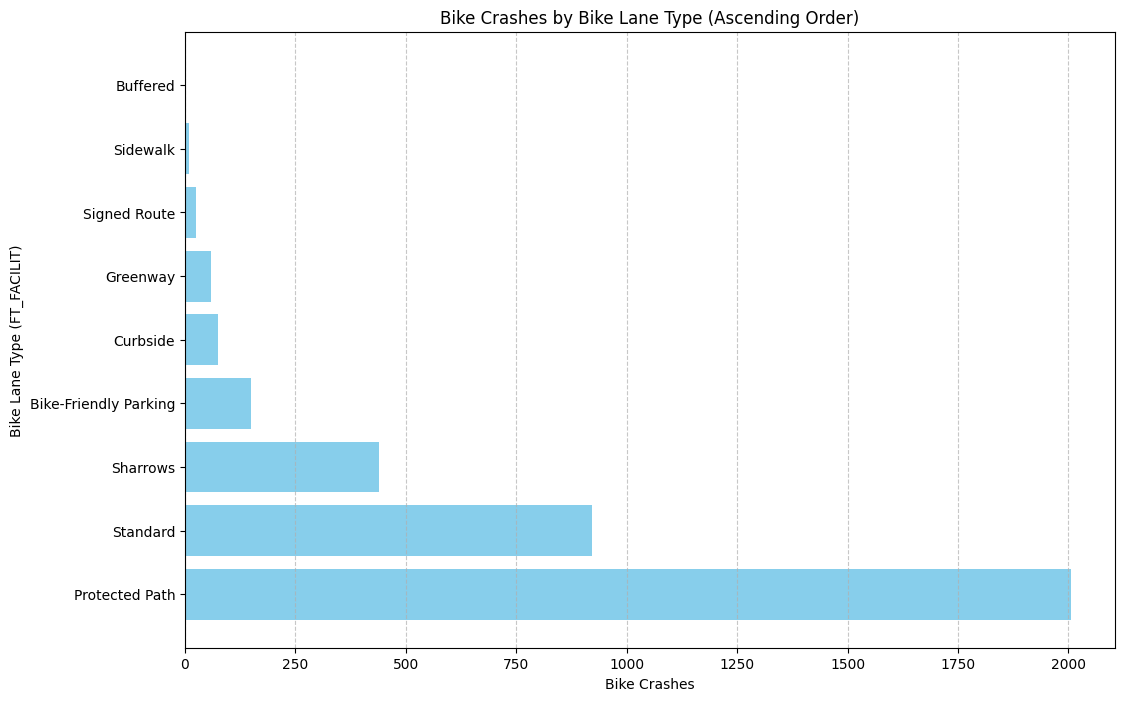

In [3]:
# filtering relevant columns and dropping missing values
classification_data = data[['ft_facilit', 'number_bike_crashes']].dropna()

# converting crashes to numeric, ignoring non-numeric values
classification_data['number_bike_crashes'] = pd.to_numeric(classification_data['number_bike_crashes'], errors='coerce')

# grouping crashes by bike lane type and summing the total crashes
crash_classification = classification_data.groupby('ft_facilit')['number_bike_crashes'].sum().reset_index()

# renaming columns for clarity
crash_classification.columns = ['Bike Lane Type (FT_FACILIT)', 'Bike Crashes']

# filtering out bike lane types with zero crashes
crash_classification_filtered = crash_classification[(crash_classification['Bike Crashes'] > 0) & (crash_classification['Bike Lane Type (FT_FACILIT)'].str.upper() != '<NULL>')]

# sorting by bike crashes in ascending order
crash_classification_sorted = crash_classification_filtered.sort_values(by='Bike Crashes', ascending=False)

# displaying the sorted classification results
print(crash_classification_sorted)

# plotting the crash classification results
plt.figure(figsize=(12, 8))
plt.barh(crash_classification_sorted['Bike Lane Type (FT_FACILIT)'], crash_classification_sorted['Bike Crashes'], color='skyblue')

# customizing the plot
plt.xlabel("Bike Crashes")
plt.ylabel("Bike Lane Type (FT_FACILIT)")
plt.title("Bike Crashes by Bike Lane Type (Ascending Order)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# showing the plot
plt.show()